# MACHINE LEARNING WEEKEND - Entry task

In [2]:
# will use libs for numerics, html requests and plotting (directly to browser)
import numpy as np
import requests
from matplotlib import pyplot as plt
%matplotlib inline

In [188]:
# function for requesting Kazachstan's machine for outputs on x_vals inputs

def GetY(x_vals):
    N = len(x_vals)
    y_vals = np.zeros(N)
    count = 0
    
    print('Requesting...')
    for x in x_vals:
        if (int( count % (N/10) ) == 0):
            print('Processed: ' + str(int(100*count/N)) + '%')
                
        url = "http://165.227.157.145:8080/api/do_measurement?x={}".format(x)
        r = requests.get(url)
        json_data = r.json()
        y_vals[count] = ( json_data['data']['y'] )
        count += 1
        
    print('Finished !')
    return y_vals

## Source INconsistency   
The source itself doesn't send the same output for the same input. See below.

In [190]:
# requesting x=0 1,000 times
xArr = np.zeros(1000)
yArr = GetY(xArr)

Requesting...
Processed: 0%
Processed: 10%
Processed: 20%
Processed: 30%
Processed: 40%
Processed: 50%
Processed: 60%
Processed: 70%
Processed: 80%
Processed: 90%
Finished !


### The histogram for input $x=0$ :

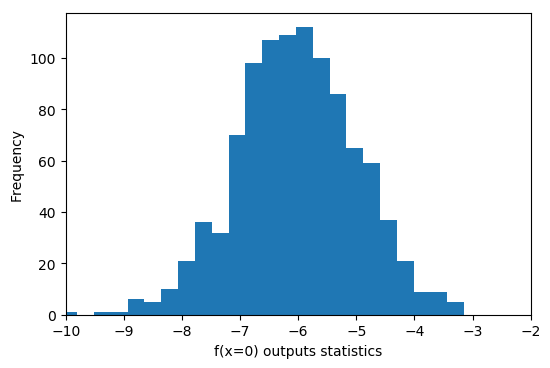

In [198]:
plt.figure(num=None, figsize=(6, 4), dpi=100)
plt.hist(yArr, bins = 24)
plt.xlabel('f(x=0) outputs statistics')
plt.ylabel('Frequency')
plt.xlim(-10,-2)
plt.show()

Seems pretty gaussian.  
**Question: ** Is it really Gaussian on bigger sample (10,000)?

In [43]:
# requesting x=0 - 10,000 times
xArr = np.zeros(10000)
yArr = GetY(xArr)

Requesting...
Processed: 0%
Processed: 10%
Processed: 20%
Processed: 30%
Processed: 40%
Processed: 50%
Processed: 60%
Processed: 70%
Processed: 80%
Processed: 90%
Finished !


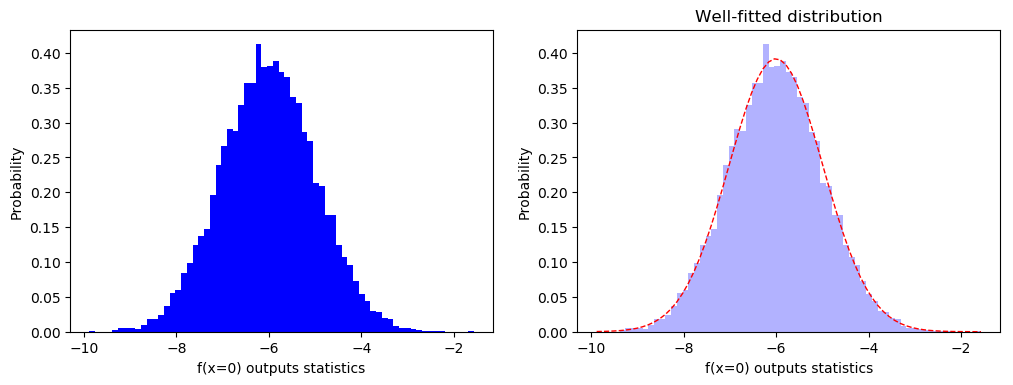

In [44]:
# normed to probability distribution

plt.figure(num=None, figsize=(12, 4), dpi=100)

plt.subplot(121)
nbins = 67 # check 'Last notes' for explanation of that 67
plt.hist(yArr, nbins, normed=1, facecolor='blue')
plt.xlabel('f(x=0) outputs statistics')
plt.ylabel('Probability')

# gaussian fit

plt.subplot(122)
n, bins, patches = plt.hist(yArr, nbins, normed=1, facecolor='blue', alpha=0.3)

from scipy.stats import norm
import matplotlib.mlab as mlab

(mu, sigma) = norm.fit(yArr)
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--', linewidth=1)

plt.title('Well-fitted distribution')
plt.xlabel('f(x=0) outputs statistics')
plt.ylabel('Probability')

plt.show()

As we clearly see, output is distributed gaussian-randomly around $\mu_0=-6$ with deviation $\sigma_0$= 1.  
From this we can write the first shot of our blackbox function:  
$$ f(0) \sim \text{Norm}(\mu_0, \sigma_0)$$

That means, the probability to obtain output $y$ within interval $\langle a, b \rangle$ for x=0 input is:
$$ P(y\in \langle a, b \rangle)  = \int_a^b \text{d}t \frac{1}{\sqrt{2\pi\sigma_0^2}} 
\exp\Bigg({\frac{-(t -\mu_0)^2}{2\sigma_0^2}}\Bigg)$$

**Question:** Does the gaussian distribution hold for any input $x$ ?

Requesting...
Finished !


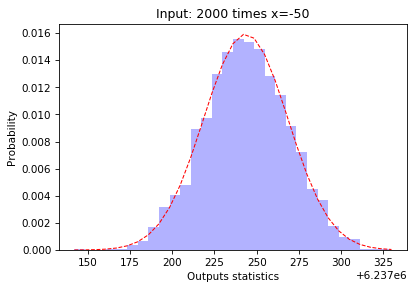

Requesting...
Finished !


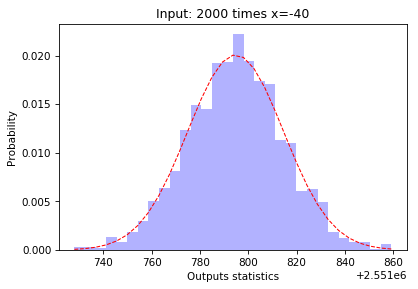

Requesting...
Finished !


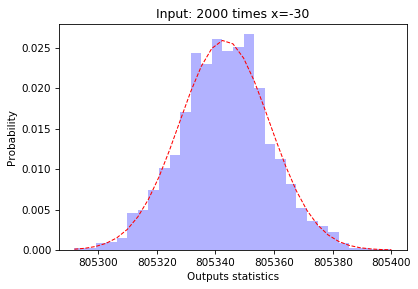

Requesting...
Finished !


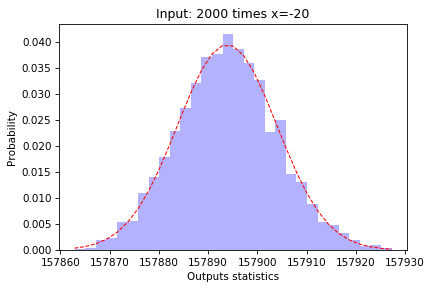

Requesting...
Finished !


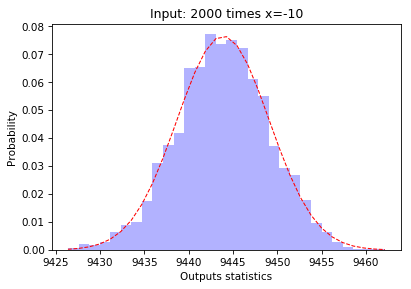

Requesting...
Finished !


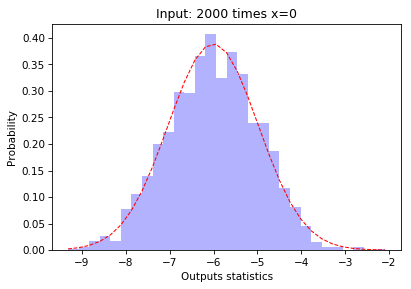

Requesting...
Finished !


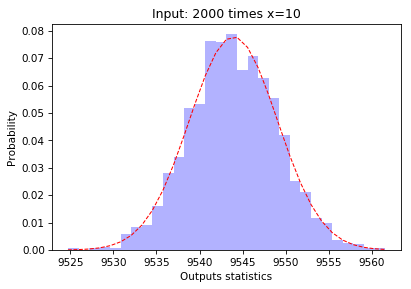

Requesting...
Finished !


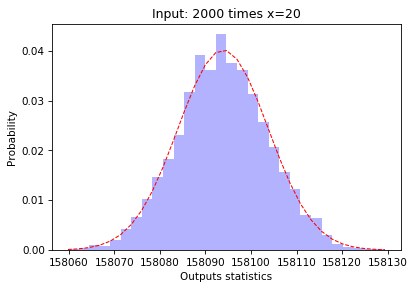

Requesting...
Finished !


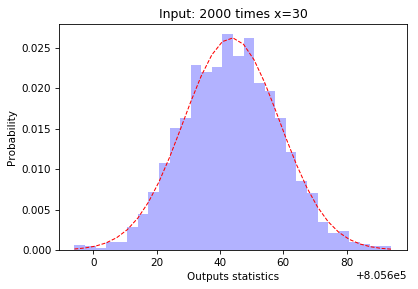

Requesting...
Finished !


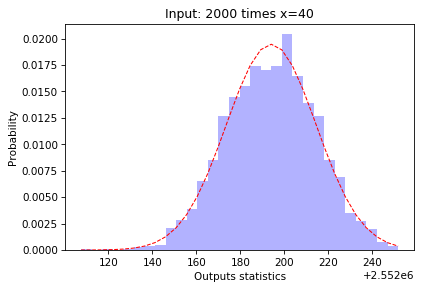

Requesting...
Finished !


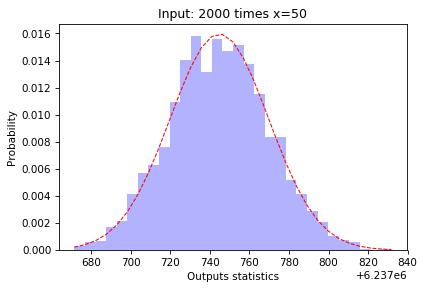

In [113]:
# choosing reasonable symmetric interval x = -50, -40, ...., 50.
# sample size = 2000 - just to see, whether the distribution changes off or not

for x in range(-50,60,10):
    xArr = x * np.ones(2000) 
    yArr = GetY(xArr)
    
    plt.figure(num=None, figsize=(6, 4), dpi=75)
    
    nbins = 30    #according to F-D rule
    n, bins, patches = plt.hist(yArr, nbins, normed=1, facecolor='blue', alpha=0.3)
    (mu, sigma) = norm.fit(yArr)
    y = mlab.normpdf(bins, mu, sigma)
    plt.plot(bins, y, 'r--', linewidth=1)
    
    plt.title('Input: 2000 times x={}'.format(x))
    plt.xlabel('Outputs statistics')
    plt.ylabel('Probability')
    plt.show()

Seems that the output behaves gaussian-randomly for any input $x$. Then we can generalize:

$$ f(x) \sim \text{Norm}(\mu(x), \sigma(x))$$

**Question:** How $\mu(x)$ and $\sigma(x)$ are evolving with $x$?  
Let's investigate.

## Evolution of means $\mu(x)$ and dispersions $\sigma(x)$
Let's find the means for the same input: $\langle-50, 50\rangle$, but now with step $= 1$:

In [178]:
# here are used just 200 samples of various x for purpose of μ(x), σ(x) calculation
mu = np.zeros(101)
sigma = np.zeros(101)

count=0
for x in range(-50,51):
    #if (x % 10 == 0):
    print('Run for x={}'.format(x))
    xArr = x * np.ones(200) 
    yArr = GetY(xArr)
    (mu[count], sigma[count]) = norm.fit(yArr)
    count += 1
    
print('FINISHED!')

Run for x=-50
Requesting...
Finished !
Run for x=-49
Requesting...
Finished !
Run for x=-48
Requesting...
Finished !
Run for x=-47
Requesting...
Finished !
Run for x=-46
Requesting...
Finished !
Run for x=-45
Requesting...
Finished !
Run for x=-44
Requesting...
Finished !
Run for x=-43
Requesting...
Finished !
Run for x=-42
Requesting...
Finished !
Run for x=-41
Requesting...
Finished !
Run for x=-40
Requesting...
Finished !
Run for x=-39
Requesting...
Finished !
Run for x=-38
Requesting...
Finished !
Run for x=-37
Requesting...
Finished !
Run for x=-36
Requesting...
Finished !
Run for x=-35
Requesting...
Finished !
Run for x=-34
Requesting...
Finished !
Run for x=-33
Requesting...
Finished !
Run for x=-32
Requesting...
Finished !
Run for x=-31
Requesting...
Finished !
Run for x=-30
Requesting...
Finished !
Run for x=-29
Requesting...
Finished !
Run for x=-28
Requesting...
Finished !
Run for x=-27
Requesting...
Finished !
Run for x=-26
Requesting...
Finished !
Run for x=-25
Requesting.

## Visualisation and determining the $\mu(x)$

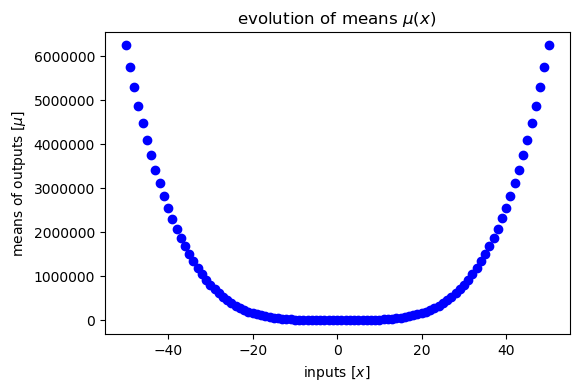

In [372]:
xArr = np.linspace(-50,50,101)

plt.figure(num=None, figsize=(6, 4), dpi=100)
plt.plot(xArr, mu, 'bo')
plt.title('evolution of means $\mu(x)$')
plt.xlabel('inputs [$x$]')
plt.xlim(-55,55)
plt.ylabel('means of outputs [$\mu$]')
plt.show()

Looks **symmetrical**. Is it?

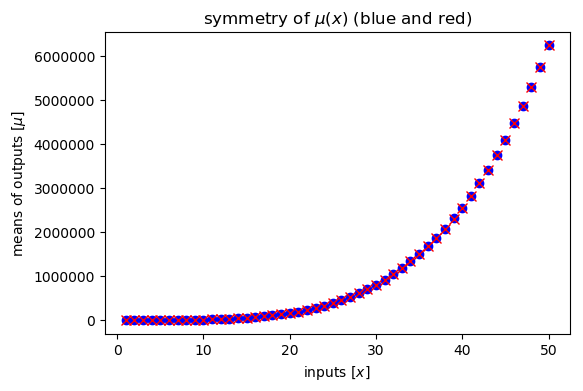

In [229]:
plt.figure(num=None, figsize=(6, 4), dpi=100)
plt.plot(xArr[xArr>0], mu[xArr>0], 'bo')
plt.plot(-xArr[xArr<0],mu[xArr<0], 'rx', markersize=7)
plt.title('symmetry of $\mu(x)$ (blue and red)')
plt.xlabel('inputs [$x$]')
plt.ylabel('means of outputs [$\mu$]')
plt.show()

Seems so. The profile looks polynomial or exponentional, the _log-log graph_ could say more:

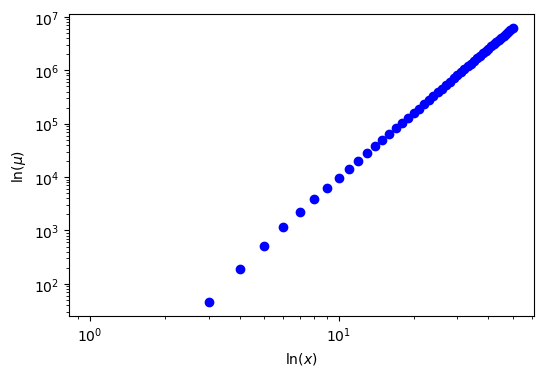

In [231]:
plt.figure(num=None, figsize=(6, 4), dpi=100)
plt.plot(xArr[xArr>0], mu[xArr>0], 'bo')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('ln($x$)')
plt.ylabel('ln($\mu$)')
plt.show()

The $\mu(x)$ is definitely polynomial-behaving on the big scale:  
$$\mu(x) = ax^b \rightarrow \ln(\mu) = \ln(a) + b\ln(x)$$

Inclination $b$ (taking e.g. the top-right point and the 5th point from down):

In [235]:
b = (np.log(mu[-1]) - np.log(mu[55])) / (np.log(xArr[-1]) - np.log(xArr[55]))
print(b)

4.07979447543


Factor $a$ for the farthest (most influenced) data-point:

In [236]:
a = mu[-1] / xArr[-1]**4.08
print(a)

0.729843638796


After soft approximation ($a = 0.73, b = 4.08$), the relation takes the form: 
$$\mu(x) = a x^b - \mu_0$$

The $\mu_0 = -6$ has been added to the fit since, on the small scale, it's obvious that the relation $ax^b$ doesn't predict the $x=0$ situation correctly.

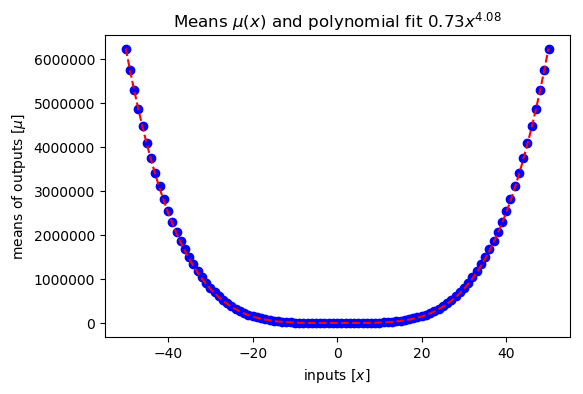

In [379]:
# plot + fit with calculated parameters
plt.figure(num=None, figsize=(6, 4), dpi=100)
plt.plot(xArr, mu, 'bo')
plt.plot(xArr, 0.73*(abs(xArr)**(4.08) - 6), 'r--')
plt.title('Means $\mu(x)$ and polynomial fit $0.73x^{4.08}$')
plt.xlabel('inputs [$x$]')
plt.xlim(-55,55)
plt.ylabel('means of outputs [$\mu$]')
plt.show()

## Visualisation and determining the $\sigma(x)$

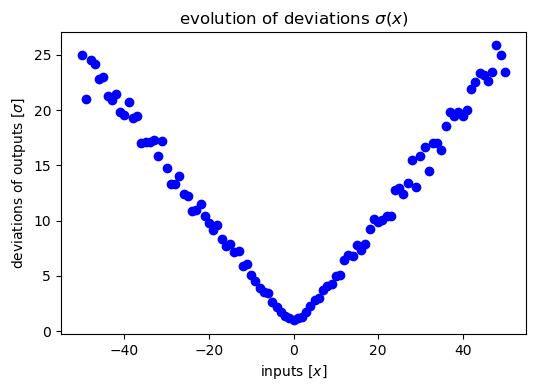

In [382]:
xArr = np.linspace(-50,50,101)

plt.figure(num=None, figsize=(6, 4), dpi=100)
plt.plot(xArr, sigma, 'bo')
plt.title('evolution of deviations $\sigma(x)$')
plt.xlabel('inputs [$x$]')
plt.xlim(-55,55)
plt.ylabel('deviations of outputs [$\sigma$]')
plt.show()

Also lookes **symmetrical**. Is it?

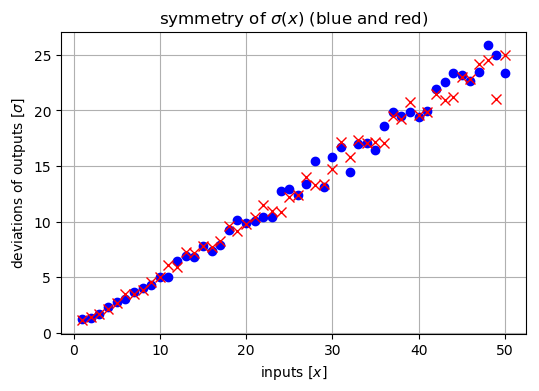

In [250]:
plt.figure(num=None, figsize=(6, 4), dpi=100)
plt.plot(xArr[xArr>0], sigma[xArr>0], 'bo')
plt.plot(-xArr[xArr<0],sigma[xArr<0], 'rx', markersize=7)
plt.title('symmetry of $\sigma(x)$ (blue and red)')
plt.xlabel('inputs [$x$]')
plt.ylabel('deviations of outputs [$\sigma$]')
plt.grid(True)
plt.show()

Not entirely convincing, but let's assume the symmetry. The profile looks pretty linear - the corresponding equation is then:

$$ \sigma(x) = kx + q$$

To fit it with least-squares method, let's use the data matrix $X$ - first column occupated with ones $X_{i1} = 1$ and second with data $X_{i2} = \text{xArr}_i$ - and koef vector $\hat{\beta} = (q, k)^T$. So in matrix form the problem is defined as:

$$ X \hat{\beta} = \sigma $$

Then the solution takes the form: $ \hat{\beta} = (X^T X)^{-1} X^T \sigma $

In [345]:
# construction of data matrix X
X = np.ones((51, 2))
X[:,1] = xArr[xArr>=0]

In [350]:
# calculating coeff vector beta
XT = np.matrix.transpose(X)
beta = np.matmul( np.matmul( np.linalg.inv( np.matmul(XT,X) ), XT), sigma[50:])
print(beta)

[ 0.07895338  0.50245716]


So the relation $\beta(x)$ is approximately:
$$ \sigma(x) = 0.5x + 0.08$$

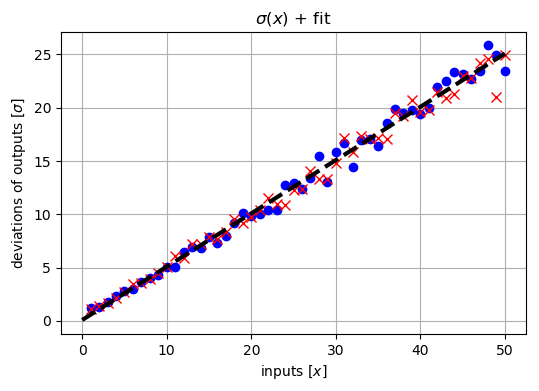

In [381]:
plt.figure(num=None, figsize=(6, 4), dpi=100)
plt.plot(xArr[xArr>0], sigma[xArr>0], 'bo')
plt.plot(-xArr[xArr<0],sigma[xArr<0], 'rx', markersize=7)
plt.plot(xArr[xArr>=0], 0.5*xArr[xArr>=0] + 0.08, 'k--', linewidth=3.0)
plt.title('$\sigma(x)$ + fit')
plt.xlabel('inputs [$x$]')
plt.ylabel('deviations of outputs [$\sigma$]')
plt.grid(True)
plt.show()

# Conclusion  
Various statistical approaches proved that the source responds to request $x$ in good approximation as a random biased gaussian generator:

$$ f(x) \sim \text{Norm}(\mu(x), \sigma(x)) = \text{Norm}(ax^b - \mu_0, kx +q)\,, $$

$$ a = 0.73, \hspace{5mm} b = 4.08, \hspace{5mm} \mu_0 = -6, \hspace{5mm} k = 0.5, \hspace{5mm} q = 0.08 $$

# Last notes  
Friedmann-Diaconis rule for optimal bin number https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule :

In [189]:
import scipy as sc
from scipy.stats import iqr
sc.stats.iqr(yArr)
FD = 2 * iqr(yArr) / ( 1000**(1/3) )
print( (max(yArr) - min(yArr)) / FD )

22.3655361704


**Link to least-square method:** https://en.wikipedia.org/wiki/Linear_least_squares_(mathematics)

**Fun-fact:** The biggest number I've found (before internal Kazachstan's server error occurred) was about:  
$$ x=115792089237316188000000000000000000000000000000000000000000000000000000000000 $$
and returned:
$$ 1.7976931348623151 \times 10^{308} $$